Text(0.5, 0.98, '2008 Great Recession: Public versus Private Construction Spending')

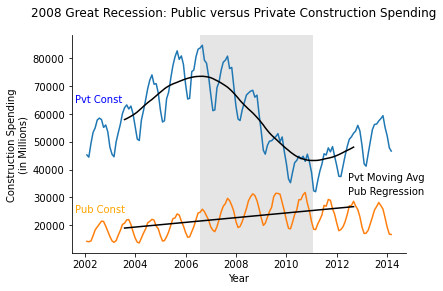

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats
%matplotlib inline

df = pd.read_csv('C:/Users/nicko/Desktop/Module 3/M3/ConstructionTimeSeriesDataV2.csv')

#DataFrame to DataTime Index
df.index = pd.date_range(freq = 'm', start = pd.Timestamp(year = 2002, month = 1, day = 31),
                            periods = len(df['Private Construction']))

#Assign x, y, and y1 variables
x = df.index
y = df['Private Construction']
y1 = df['Public Construction']


#Non-linear trend line and moving average for Private Construction

def sqErr1(row):
    return (row['Private Construction'] - row['MovAvgPri'])**2
    
df['MovAvgPri'] = np.NaN
df['sqErrPri'] = np.NaN

window = 36
window = window - window % 2

# Moving average computed use the below loop. Window chosen based on the data point's average being calculated
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvgPri'] = (0.5*df.iloc[i - int(window/2)]['Private Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Private Construction'])/float(window)

df['sqErrPri'] = (df['Private Construction'] - df['MovAvgPri'])**2

df.dropna(how = 'any', inplace = True)

#Linear trend line for public construction

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Month'], df['Public Construction'])
#print('intercept =', intercept, '    slope =', slope, '     p_value = ',p_value)

def create_regress_col(row, intercept, slope):
    return float(intercept) + float(row['Month']) * slope
    
df['regress'] = df.apply(create_regress_col,args = (intercept,slope),axis = "columns")
df['R1'] = df['Public Construction'] - df['regress']
df.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1': '{:,.0f}'.format})

#Plot
fig,ax = plt.subplots()
ax.plot(x, y,y1)
ax.plot(df['MovAvgPri'], label='Moving Avg Pri', c = 'k')
ax.plot(df['regress'], label = 'regression line', c = 'k')


#Added axis labels and title
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Year")
ax.set_ylabel("Construction Spending\n(in Millions)")
ax.axvspan(13350,15000,ymin=0,ymax = 300,facecolor='k',alpha=0.1)

ax.text(11550, 64000,'Pvt Const', color='b')
ax.text(11550, 24500,'Pub Const', color = 'orange')

ax.text(15500, 36000,'Pvt Moving Avg', color='k')
ax.text(15500, 31000,'Pub Regression', color = 'k')

fig.suptitle('2008 Great Recession: Public versus Private Construction Spending')


#ax.axvline(x = 13350, linewidth=1,color='k',label='Low',linestyle='-')
#ax.axvline(x= 14500,linewidth=1,color='k',label='High',linestyle='--')

#ax.legend(loc=1)
#ax.text(100,85,'Atypical\nStability',fontsize=14,verticalalignment='center',horizontalalignment='center',fontname='Times New Roman')






Analysis: 

The 2008 Financial Crisis led to the Great Recession and is considered to be the worst economic disaster since the Great Depression in 1929. It led to a 31.8 percent decline in housing prices, a significant rise in unemployment (well over 9%, which remained that way well into 2010), and required more than 1/2 trillion dollar bailout by the Federal Government. The graph visually depicts public and private construction spending from 2002-2014. The U.S. economy started showing signs of failure towards the end of 2006 where housing prices started to decline for the first time in decades. By the end of 2006 and early-2007, private construction spending sharply declined, while public construction spending maintained a slow, but favorable upwards trend. According to the Federal Reserve, the Great Recession began in December 2007 and lasted until June 2009. Using the above graphic, a decline in private construction spending began towards the end of 2006, into 2007, and did not rebound until at least 2011, two-years after the Great Recession ended. 

Explanation as to why public construction spending continued to rise during a financial crisis experienced in 2008 would certainly require more research and analysis, however, it is likely that public construction is budgeted for and fund allocated years in advance. Also annotated in the graph just outside the shaded area, as private construction spending started to rebound in 2011 public spending appears to slow and possibly trend negatively towards the end of 2011 through 2014. 

Resources:

Amadeo, K. (2020, October 30). 2008 financial crisis causes, costs, and could it happen again? The Balance. Retrieved September 19, 2021, from https://www.thebalance.com/2008-financial-crisis-3305679. 

Singh, M. (2021, January 10). The 2007-2008 financial crisis in Review. Investopedia. Retrieved September 19, 2021, from https://www.investopedia.com/articles/economics/09/financial-crisis-review.asp. 

